In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

In [275]:
df = pd.read_csv("/content/Assignment_Train.csv")
df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


# Data Exploration

In [276]:
df.shape

(10000, 55)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [278]:
df.describe()

,DEALER ID,mobile,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,DOB,AGE,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,...,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore
count,10000.000000,1.000000e+04,4892.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.0,8084.000000,8052.000000,...,8243.000000,1.0,8221.000000,8215.000000,8057.000000,1573.000000,9.0,8218.000000,9996.000000,9996.000000
mean,102936.459100,8.630041e+09,97612.518397,150660.758500,9.179673e+04,9.813396e+06,31.796100,0.0,0.486517,0.149652,...,0.820090,0.0,0.017516,0.147657,0.250838,0.854418,0.0,0.000608,1652.937975,55.645558
std,37830.984431,1.077717e+09,16745.027041,20847.995017,2.700018e+04,8.930654e+06,11.202075,NaN,0.499849,0.356752,...,0.384136,NaN,0.131192,0.354781,0.433522,0.352799,0.0,0.024660,984.114248,42.100616
min,49849.000000,6.000042e+09,51873.000000,124587.000000,1.040000e+04,1.011943e+06,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,-1.000000
25%,79953.750000,7.894858e+09,88425.500000,139542.000000,8.000000e+04,1.012000e+06,25.000000,0.0,0.000000,0.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,809.000000,-1.000000
50%,94631.000000,8.867377e+09,94400.000000,143238.000000,9.000000e+04,7.112001e+06,31.000000,0.0,0.000000,0.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1988.000000,73.571429
75%,108463.000000,9.588181e+09,103499.250000,160216.000000,9.900000e+04,1.605197e+07,39.000000,0.0,1.000000,0.000000,...,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,2031.000000,96.000000
max,202616.000000,9.999977e+09,241116.000000,201897.000000,1.420000e+06,3.112200e+07,79.000000,0.0,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,6311.000000,100.000000


In [279]:
# The dataset has 55 columns and my first goal is to reduce the dimensionality of the dataset while retaining most of the information

In [280]:
df.isnull().sum()

,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,1
HDB BRANCH STATE,854
FIRST NAME,0
MIDDLE NAME,7145
LAST NAME,681
mobile,0
AADHAR VERIFIED,0
Cibil Score,4297


In [281]:
df["Application Status"].value_counts()

,count
Application Status,
APPROVED,6677
DECLINED,3323


In [282]:
label_encoder = LabelEncoder()
# perform feature engineering on application status using label encoder to coneret string values to int where approved is 0 and  1 for declined
df['Application Status'] = label_encoder.fit_transform(df['Application Status'])

In [283]:
df["Application Status"].value_counts()

,count
Application Status,
0,6677
1,3323


In [284]:
phone_socials = [
    'Phone Social Premium.a23games',
    'Phone Social Premium.amazon',
    'Phone Social Premium.byjus',
    'Phone Social Premium.flipkart',
    'Phone Social Premium.housing',
    'Phone Social Premium.indiamart',
    'Phone Social Premium.instagram',
    'Phone Social Premium.isWABusiness',
    'Phone Social Premium.jeevansaathi',
    'Phone Social Premium.jiomart',
    'Phone Social Premium.microsoft',
    'Phone Social Premium.my11',
    'Phone Social Premium.paytm',
    'Phone Social Premium.rummycircle',
    'Phone Social Premium.shaadi',
    'Phone Social Premium.skype',
    'Phone Social Premium.toi',
    'Phone Social Premium.whatsapp',
    'Phone Social Premium.yatra',
    'Phone Social Premium.zoho']

In [285]:
correlations = df[phone_socials + ['Application Status']].corr()
print(correlations['Application Status'].sort_values(ascending=False))

Application Status                   1.000000
Phone Social Premium.jiomart         0.072552
Phone Social Premium.housing         0.026393
Phone Social Premium.instagram       0.015022
Phone Social Premium.shaadi          0.013353
Phone Social Premium.indiamart       0.008730
Phone Social Premium.flipkart        0.008730
Phone Social Premium.jeevansaathi    0.008145
Phone Social Premium.amazon          0.002056
Phone Social Premium.skype          -0.001602
Phone Social Premium.toi            -0.002886
Phone Social Premium.byjus          -0.004470
Phone Social Premium.microsoft      -0.005256
Phone Social Premium.zoho           -0.017498
Phone Social Premium.isWABusiness   -0.018767
Phone Social Premium.paytm          -0.025798
Phone Social Premium.whatsapp       -0.036388
Phone Social Premium.a23games             NaN
Phone Social Premium.my11                 NaN
Phone Social Premium.rummycircle          NaN
Phone Social Premium.yatra                NaN
Name: Application Status, dtype: f

In [286]:
"""phone social premium columns/features tracks the activity of the persons social account it doesn't directly affect the two-wheeler application approval and may add noise .
 (it gives us the indirect financial activity of the applicant)"""

df_cleaned = df.drop(columns = phone_socials)

In [287]:
df_cleaned.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,EMPLOYER NAME,EMPLOYER TYPE,Pan Name,name,vpa,upi_name,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,sehrawat spare parts,SALARIED,SUNIL KUMAR,SUNIL CHANDER,ABFSPAY,SUNIL KUMAR,5324.0,67.222222,High,0
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,NaN,NaN,AMRIT KUMAR,AMRIT KUMAR,OKSBI,Amrit Kumar,1998.0,100.000000,High,0
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,Thapas shop,SELF-EMPLOYED,ANIMESH THAPA,ANIMESH THAPA,NaN,NaN,-1.0,-1.000000,Low,0
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,agriculture farming,SELF-EMPLOYED,ADITYA KUMAR,ADITYA SINGH,PAYTM,Aditya Kumar,1998.0,72.777778,High,0
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,NaN,NaN,HARESHBHAI AMRUTBHAI PARMAR,PARMAR HARESHBHAI AMRUTBHAI,IKWIK,HARESHBHAI AMRUTBHAI,1998.0,68.095238,High,1


In [288]:
# contains same value in all the 10000 rows since there is no variation it is better to remove this column to reduce dimensionality.
df_cleaned["AADHAR VERIFIED"].value_counts()
df_cleaned["MOBILE VERIFICATION"].value_counts()

,count
MOBILE VERIFICATION,
True,10000


In [289]:
df_cleaned.drop(columns = ['AADHAR VERIFIED',"MOBILE VERIFICATION"], inplace = True) # dropped the aadhar verfified and mobile verification column has there is no variation

In [290]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   Cibil Score                          5703 non-null   object 
 9   DEALER NAME                          9996 non-null   object 
 10  TOTAL ASSET COST                     4892 non-null   float64
 11  ASSET CTG                    

In [291]:
label_encoder = LabelEncoder()
# perform feature engineering for phone_phoneFootprintStrengthOverall using label encoder
df_cleaned['phone_phoneFootprintStrengthOverall'] = label_encoder.fit_transform(df_cleaned['phone_phoneFootprintStrengthOverall'])

phone_match = ["phone_digitalage",
              "phone_nameMatchScore",
              "phone_phoneFootprintStrengthOverall"]

In [292]:
correlations = df_cleaned[phone_match + ['Application Status']].corr()
print(correlations['Application Status'].sort_values(ascending=False))
# checking the correlation <0 negative correlation, 0 no correlation , >0 positive correlation

Application Status                     1.000000
phone_phoneFootprintStrengthOverall    0.021125
phone_nameMatchScore                  -0.018803
phone_digitalage                      -0.037427
Name: Application Status, dtype: float64


In [293]:
# drop dob since age is already given and it provides appropriate information
# drop phone_digitalage , phone_nameMatchScore since it has negative correlation and the features may not be related
# name values doesn't hold any useful information in case of loan approval prediction
# mobile number is not a significant feature for loan approval
# vpa virtual payment address gives the vpa on which the upi was discovred
# employer name ,upi name, personal email address, dealer name just acts as place holder and doesnt shows much significance for loan approval
df_cleaned.drop(columns = [
    "DOB",
    "phone_digitalage",
    "phone_nameMatchScore",
    "FIRST NAME",
    "MIDDLE NAME",
    "LAST NAME",
    "name",
    "Pan Name",
    "mobile",
    "vpa",
    "EMPLOYER NAME",
    "upi_name",
    "APPLICATION LOGIN DATE",
    "Personal Email Address",
    "DEALER NAME"
    ], inplace = True)



In [294]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   HDB BRANCH NAME                      9999 non-null   object 
 2   HDB BRANCH STATE                     9146 non-null   object 
 3   Cibil Score                          5703 non-null   object 
 4   TOTAL ASSET COST                     4892 non-null   float64
 5   ASSET CTG                            4892 non-null   object 
 6   ASSET MODEL NO                       10000 non-null  int64  
 7   APPLIED AMOUNT                       10000 non-null  int64  
 8   PRIMARY ASSET MAKE                   10000 non-null  object 
 9   Primary Asset Model No               10000 non-null  object 
 10  MARITAL STATUS                       5106 non-null   object 
 11  GENDER                       

In [295]:
print(df_cleaned['Cibil Score'].describe())


count     5703
unique     267
top        752
freq       105
Name: Cibil Score, dtype: object


In [296]:
# count of chibil score with no response as the value
no_response_count = df_cleaned[df_cleaned['Cibil Score'].str.strip() == 'NO RESPONSE'].shape[0]
print(no_response_count)


31


In [297]:
# remove the no response row
indices_to_drop = df_cleaned[df_cleaned['Cibil Score'].str.strip() == 'NO RESPONSE'].index

df_cleaned = df_cleaned.drop(indices_to_drop)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9969 non-null   int64  
 1   HDB BRANCH NAME                      9968 non-null   object 
 2   HDB BRANCH STATE                     9121 non-null   object 
 3   Cibil Score                          5672 non-null   object 
 4   TOTAL ASSET COST                     4882 non-null   float64
 5   ASSET CTG                            4882 non-null   object 
 6   ASSET MODEL NO                       9969 non-null   int64  
 7   APPLIED AMOUNT                       9969 non-null   int64  
 8   PRIMARY ASSET MAKE                   9969 non-null   object 
 9   Primary Asset Model No               9969 non-null   object 
 10  MARITAL STATUS                       5096 non-null   object 
 11  GENDER                             

In [298]:
df_cleaned.drop_duplicates(inplace = True)
# remove duplicate values

In [299]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9941 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9941 non-null   int64  
 1   HDB BRANCH NAME                      9940 non-null   object 
 2   HDB BRANCH STATE                     9095 non-null   object 
 3   Cibil Score                          5660 non-null   object 
 4   TOTAL ASSET COST                     4880 non-null   float64
 5   ASSET CTG                            4880 non-null   object 
 6   ASSET MODEL NO                       9941 non-null   int64  
 7   APPLIED AMOUNT                       9941 non-null   int64  
 8   PRIMARY ASSET MAKE                   9941 non-null   object 
 9   Primary Asset Model No               9941 non-null   object 
 10  MARITAL STATUS                       5093 non-null   object 
 11  GENDER                             

In [300]:
# df_cleaned to csv
df_cleaned.to_csv("cleaned_data.csv", index=False)

In [301]:
df_cleaned.isnull().sum()

,0
DEALER ID,0
HDB BRANCH NAME,1
HDB BRANCH STATE,846
Cibil Score,4281
TOTAL ASSET COST,5061
ASSET CTG,5061
ASSET MODEL NO,0
APPLIED AMOUNT,0
PRIMARY ASSET MAKE,0
Primary Asset Model No,0


Text(0.5, 1.0, 'Histogram with KDE Plot')

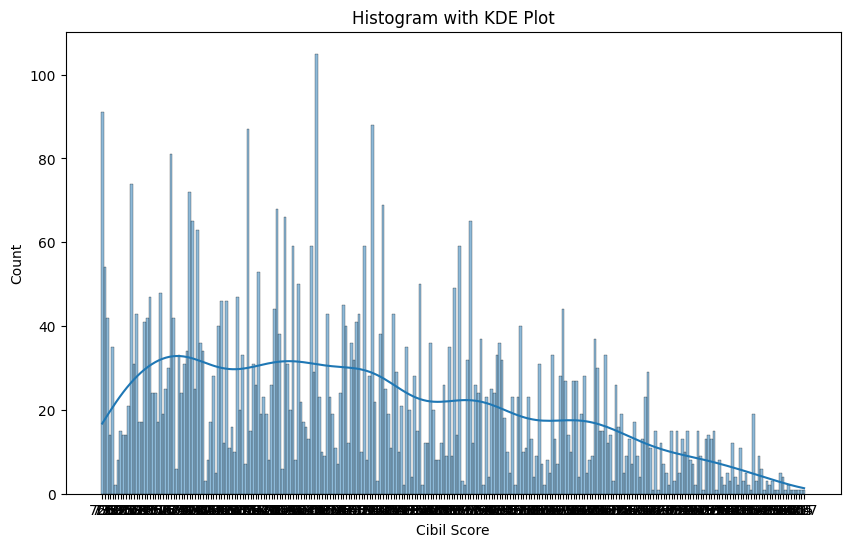

In [302]:
# histogram with kde plot to check the distribution of Cibil score

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Cibil Score'], kde=True)
plt.title('Histogram with KDE Plot')

In [303]:
df_cleaned['Cibil Score'] = pd.to_numeric(df_cleaned['Cibil Score'], errors='coerce')
df_cleaned['Cibil Score'].fillna(df_cleaned['Cibil Score'].median(), inplace=True)
# the graph is slightly skewed hence used median which is not prone to outliers

In [304]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9941 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9941 non-null   int64  
 1   HDB BRANCH NAME                      9940 non-null   object 
 2   HDB BRANCH STATE                     9095 non-null   object 
 3   Cibil Score                          9941 non-null   float64
 4   TOTAL ASSET COST                     4880 non-null   float64
 5   ASSET CTG                            4880 non-null   object 
 6   ASSET MODEL NO                       9941 non-null   int64  
 7   APPLIED AMOUNT                       9941 non-null   int64  
 8   PRIMARY ASSET MAKE                   9941 non-null   object 
 9   Primary Asset Model No               9941 non-null   object 
 10  MARITAL STATUS                       5093 non-null   object 
 11  GENDER                             

In [305]:
data =["DEALER ID","Cibil Score","TOTAL ASSET COST","APPLIED AMOUNT","AGE","phone_phoneFootprintStrengthOverall"]

# pd.DataFrame(data)

In [306]:
correlations = df_cleaned[data + ['Application Status']].corr()
print(correlations['Application Status'].sort_values(ascending=False))

Application Status                     1.000000
DEALER ID                              0.044914
phone_phoneFootprintStrengthOverall    0.020436
APPLIED AMOUNT                        -0.001077
AGE                                   -0.044393
Cibil Score                           -0.525478
TOTAL ASSET COST                            NaN
Name: Application Status, dtype: float64


In [307]:
df_cleaned["DEALER ID"].value_counts()

,count
DEALER ID,
112006,74
88282,51
77503,38
79245,38
94718,37
...,...
62462,1
108292,1
64913,1


In [309]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9941 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9941 non-null   int64  
 1   HDB BRANCH NAME                      9940 non-null   object 
 2   HDB BRANCH STATE                     9095 non-null   object 
 3   Cibil Score                          9941 non-null   float64
 4   TOTAL ASSET COST                     4880 non-null   float64
 5   ASSET CTG                            4880 non-null   object 
 6   ASSET MODEL NO                       9941 non-null   int64  
 7   APPLIED AMOUNT                       9941 non-null   int64  
 8   PRIMARY ASSET MAKE                   9941 non-null   object 
 9   Primary Asset Model No               9941 non-null   object 
 10  MARITAL STATUS                       5093 non-null   object 
 11  GENDER                             

In [211]:
# mapping for gender

df_cleaned['GENDER'] = df_cleaned['GENDER'].map({'Male': 0, 'Female': 1})

In [212]:
# group by age and gender and fill na in marital status with mode value of each group
df_cleaned['MARITAL STATUS'] = df_cleaned['MARITAL STATUS'].fillna(
    df_cleaned.groupby(['AGE', 'GENDER'])['MARITAL STATUS'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
)


In [213]:
df_cleaned["MARITAL STATUS"].value_counts()

,count
MARITAL STATUS,
Married,7647
Single,2247
Unknown,47


Text(0.5, 1.0, 'Histogram with KDE Plot')

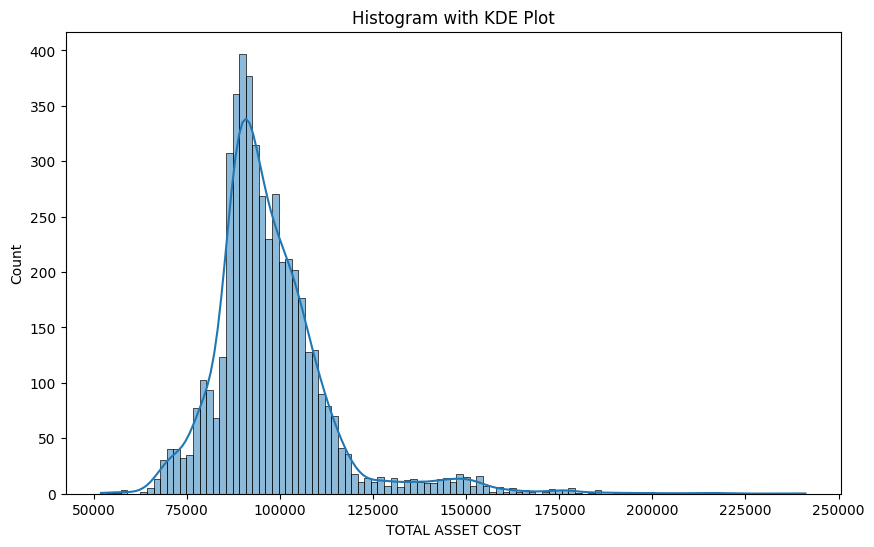

In [214]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['TOTAL ASSET COST'], kde=True)
plt.title('Histogram with KDE Plot')

In [215]:
# Fill Na with median since the total asset cost is right skewed
df_cleaned['TOTAL ASSET COST'].fillna(df_cleaned['TOTAL ASSET COST'].median(), inplace=True)


In [216]:
df_cleaned["ASSET CTG"].value_counts()

,count
ASSET CTG,
MCECA,1815
SCECA,1226
MCEXA,1181
SCEXA,264
MCPRA,126
MCECB,69
MOECA,67
MCECC,46
MCEXB,28


In [217]:
# checking mean of total asset cost for each asset ctg
print(df_cleaned.groupby('ASSET CTG')['TOTAL ASSET COST'].mean())


ASSET CTG
EMECA     91648.700000
ESECB    110209.800000
ESNRB     75500.000000
ESNRC     77249.454545
MCECA     87778.244077
MCECB     83402.362319
MCECC     80834.630435
MCEXA    104603.839966
MCEXB    151725.071429
MCPRA    159272.166667
MOECA     69321.731343
SCECA     98769.057096
SCEXA    108145.772727
Name: TOTAL ASSET COST, dtype: float64


In [218]:
# function to fill asset ctg based on total asset cost for each group
def fill_asset_ctg(group):
    mode_value = group['ASSET CTG'].mode()
    if not mode_value.empty:
        group['ASSET CTG'] = group['ASSET CTG'].fillna(mode_value[0])
    return group

df_cleaned = df_cleaned.groupby(pd.cut(df_cleaned['TOTAL ASSET COST'], bins=5)).apply(fill_asset_ctg)


<ipython-input-218-a853cd19e715>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cleaned = df_cleaned.groupby(pd.cut(df_cleaned['TOTAL ASSET COST'], bins=5)).apply(fill_asset_ctg)


In [219]:
df_cleaned["EMPLOY CONSTITUTION"].value_counts()

,count
EMPLOY CONSTITUTION,
SELF-EMPLOYED,3461
SALARIED,1528


In [220]:
# mapping employ constitution
df_cleaned['EMPLOY CONSTITUTION'] = df_cleaned['EMPLOY CONSTITUTION'].map({'SELF-EMPLOYED': 0, 'SALARIED': 1})

In [221]:
df_cleaned["EMPLOYER TYPE"].value_counts()

,count
EMPLOYER TYPE,
SELF-EMPLOYED,3462
SALARIED,1353
Non-Government,151
Government,23


In [222]:
# mapping employer type
df_cleaned['EMPLOYER TYPE'] = df_cleaned['EMPLOYER TYPE'].map({'SELF-EMPLOYED': 0, 'SAALARIED': 1, 'Non-Governmnet':2,'Government':3})

In [223]:
#mode imputation for employ constitution
df_cleaned['EMPLOY CONSTITUTION'].fillna(df_cleaned['EMPLOY CONSTITUTION'].mode()[0], inplace=True)


In [224]:
#mode imputation for employer type
df_cleaned['EMPLOYER TYPE'].fillna(df_cleaned['EMPLOYER TYPE'].mode()[0], inplace=True)

In [225]:
df_cleaned["ADDRESS TYPE"].value_counts()

,count
ADDRESS TYPE,
Self/Spouse Owned,2266
RESIDENCE,2164
Parental,1785
Rented,415
Company Provided,10
PARENT OWNED-HOUSE,9
OWNED-BUNGLOW,5
OWNED-PENTHOUSE,4
OWNDED-FLAT,3


In [226]:
#frequency encodeing for address type
threshold = 10
value_counts = df_cleaned['ADDRESS TYPE'].value_counts()
df_cleaned['ADDRESS TYPE'] = df_cleaned['ADDRESS TYPE'].apply(lambda x: x if value_counts.get(x, 0) > threshold else 'Other')

print(df_cleaned)


                           DEALER ID    HDB BRANCH NAME HDB BRANCH STATE  \
TOTAL ASSET COST                                                           
(51683.757, 89721.6] 3        192020      SAHARANPUR-SF    UTTAR PRADESH   
                     8         80787            JIND-SF          HARYANA   
                     10        78043        VARANASI-SF    UTTAR PRADESH   
                     25        86133       DARBHANGA-SF            BIHAR   
                     26        87786         SAHARSA-SF            BIHAR   
...                              ...                ...              ...   
(203267.4, 241116.0] 4662     112250  PATHANAMTHITTA-SF           KERALA   
                     5452     199085         SILCHAR-SF              NaN   
                     5683     108966          BARELI-SF    UTTAR PRADESH   
                     8245      85446       BHAGALPUR-SF            BIHAR   
                     9689      76652          HAVERI-SF        KARNATAKA   

           

In [227]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9941 entries, (Interval(51683.757, 89721.6, closed='right'), 3) to (Interval(203267.4, 241116.0, closed='right'), 9689)
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9941 non-null   int64  
 1   HDB BRANCH NAME                      9940 non-null   object 
 2   HDB BRANCH STATE                     9095 non-null   object 
 3   Cibil Score                          9941 non-null   float64
 4   TOTAL ASSET COST                     9941 non-null   float64
 5   ASSET CTG                            9941 non-null   object 
 6   ASSET MODEL NO                       9941 non-null   int64  
 7   APPLIED AMOUNT                       9941 non-null   int64  
 8   PRIMARY ASSET MAKE                   9941 non-null   object 
 9   Primary Asset Model No               9941 non-null   object 
 10  

In [228]:
df_cleaned.dropna(inplace=True)

# Visualization

In [229]:
numerical_columns = ["DEALER ID","Cibil Score","TOTAL ASSET COST","ASSET MODEL NO","APPLIED AMOUNT","GENDER","AGE","EMPLOY CONSTITUTION","EMPLOYER TYPE"]

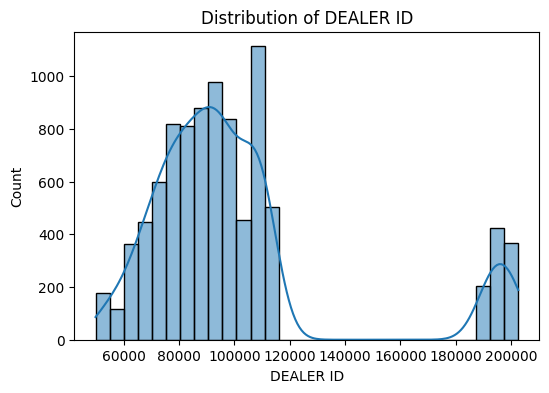

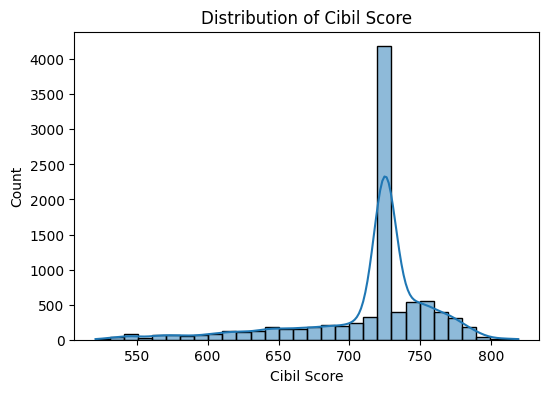

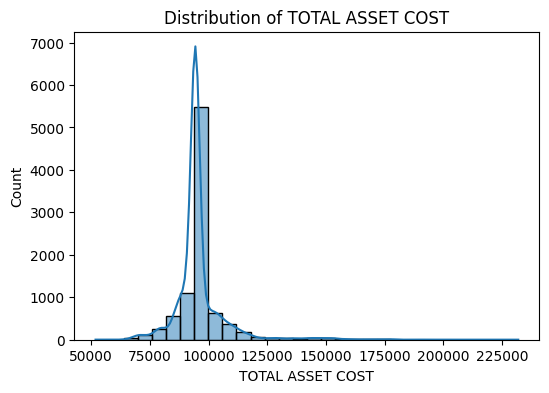

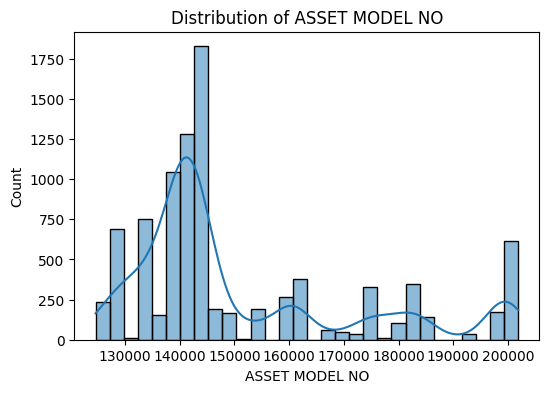

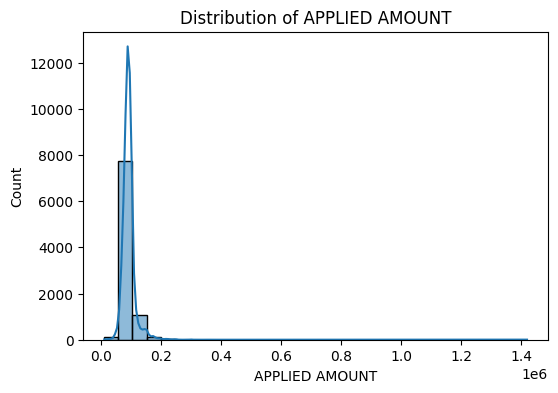

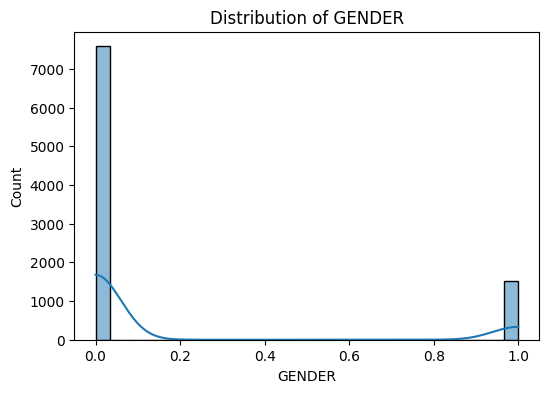

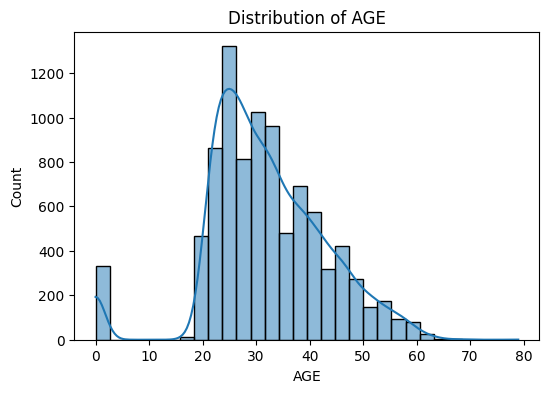

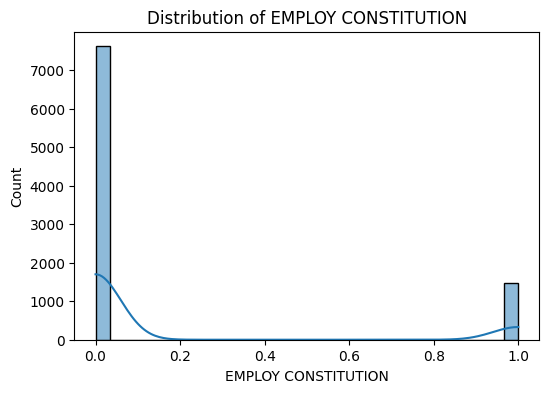

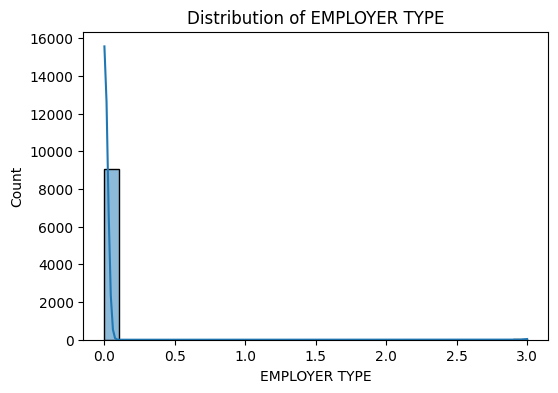

In [230]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [231]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9094 entries, (Interval(51683.757, 89721.6, closed='right'), 3) to (Interval(203267.4, 241116.0, closed='right'), 9689)
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9094 non-null   int64  
 1   HDB BRANCH NAME                      9094 non-null   object 
 2   HDB BRANCH STATE                     9094 non-null   object 
 3   Cibil Score                          9094 non-null   float64
 4   TOTAL ASSET COST                     9094 non-null   float64
 5   ASSET CTG                            9094 non-null   object 
 6   ASSET MODEL NO                       9094 non-null   int64  
 7   APPLIED AMOUNT                       9094 non-null   int64  
 8   PRIMARY ASSET MAKE                   9094 non-null   object 
 9   Primary Asset Model No               9094 non-null   object 
 10  

In [232]:
print(df_cleaned.groupby('HDB BRANCH STATE')['Application Status'].mean())

HDB BRANCH STATE
ANDHRA PRADESH      0.451923
ASSAM               0.263415
BIHAR               0.256790
CHHATTISGARH        0.367347
DELHI               0.337278
GUJARAT             0.376147
HARYANA             0.384740
HIMACHAL PRADESH    0.600000
JHARKHAND           0.325397
KARNATAKA           0.401639
KERALA              0.469027
MADHYA PRADESH      0.349338
MAHARASHTRA         0.291902
ORISSA              0.318548
PUDUCHERRY          0.230769
PUNJAB              0.443137
RAJASTHAN           0.360000
SIKKIM              0.411765
TAMIL NADU          0.299799
TELANGANA           0.436860
TRIPURA             0.625000
UTTAR PRADESH       0.300355
UTTARAKHAND         0.355014
WEST BENGAL         0.285311
Name: Application Status, dtype: float64


In [233]:
df_cleaned.drop(columns = ["HDB BRANCH STATE","HDB BRANCH NAME"],inplace = True)

In [234]:
df_cleaned["Primary Asset Model No"].value_counts()

,count
Primary Asset Model No,
ACTIVA 6G DLX BSVI,685
SPLENDOR PLUS SELF DRUM BSVI I3S,608
SPLENDOR PLUS XTEC BSVI,472
SPLENDOR PLUS SELF START DRUM BSVI,457
SP 125 DISC BS VI,403
...,...
ACTIVA 20TH YR ED STD BSVI,1
GIXXER SF 250 BSVI,1
C 350 DC HALCYON BLACK BSVI,1


In [235]:
# creating a contingency table and performing chi squared test to know the significance of the primary asset model no

contingency_table = pd.crosstab(df_cleaned['Primary Asset Model No'], df_cleaned['Application Status'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")

Chi-Square Statistic: 461.1949049763815, p-value: 1.5392260506977788e-13


In [236]:
#frequency encoding for primary asset model no
frequency_encoding = df_cleaned['Primary Asset Model No'].value_counts(normalize=True)

df_cleaned['Primary Asset Model No Encoded'] = df_cleaned['Primary Asset Model No'].map(frequency_encoding)
df_cleaned.drop(columns = ["Primary Asset Model No"],inplace = True)

In [237]:
# primary asset make target encoding with application status
target_mean_pam = df_cleaned.groupby('PRIMARY ASSET MAKE')['Application Status'].mean()
df_cleaned['Primary Asset Encoded'] = df_cleaned['PRIMARY ASSET MAKE'].map(target_mean_pam)
df_cleaned.drop(columns = ["PRIMARY ASSET MAKE"],inplace = True)

In [238]:
df_cleaned["MARITAL STATUS"].value_counts()

,count
MARITAL STATUS,
Married,7016
Single,2035
Unknown,43


In [239]:
# label encoding for marital status
label_encoder = LabelEncoder()
df_cleaned["MARITAL STATUS"] = label_encoder.fit_transform(df_cleaned['MARITAL STATUS'])

In [240]:
df_cleaned["ASSET CTG"].value_counts()

,count
ASSET CTG,
MCEXA,5727
MCECA,1600
SCECA,1167
SCEXA,243
MCPRA,108
MCECB,64
MOECA,60
MCECC,44
MCEXB,26


In [241]:
contingency_table = pd.crosstab(df_cleaned['ASSET CTG'], df_cleaned['Application Status'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")


Chi-Square Statistic: 2674.1400480927623, p-value: 0.0


In [242]:
#target encoding
target_mean_assetctg = df_cleaned.groupby('ASSET CTG')['Application Status'].mean()

df_cleaned['Asset Category Encoded'] = df_cleaned['ASSET CTG'].map(target_mean_assetctg)
df_cleaned.drop(columns = ["ASSET CTG"],inplace = True)

In [243]:
contingency_table = pd.crosstab(df_cleaned['ADDRESS TYPE'], df_cleaned['Application Status'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_val}")

Chi-Square Statistic: 3608.736282676481, p-value: 0.0


In [244]:
df_cleaned["ADDRESS TYPE"].value_counts()

,count
ADDRESS TYPE,
Other,3070
Self/Spouse Owned,2018
RESIDENCE,1997
Parental,1597
Rented,412


In [245]:
# label encoding
label_encoder = LabelEncoder()
df_cleaned["ADDRESS TYPE"] = label_encoder.fit_transform(df_cleaned['ADDRESS TYPE'])

In [246]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9094 entries, (Interval(51683.757, 89721.6, closed='right'), 3) to (Interval(203267.4, 241116.0, closed='right'), 9689)
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9094 non-null   int64  
 1   Cibil Score                          9094 non-null   float64
 2   TOTAL ASSET COST                     9094 non-null   float64
 3   ASSET MODEL NO                       9094 non-null   int64  
 4   APPLIED AMOUNT                       9094 non-null   int64  
 5   MARITAL STATUS                       9094 non-null   int64  
 6   GENDER                               9094 non-null   int64  
 7   AGE                                  9094 non-null   int64  
 8   ADDRESS TYPE                         9094 non-null   int64  
 9   EMPLOY CONSTITUTION                  9094 non-null   float64
 10  

In [247]:
df_cleaned.head()

DEALER ID  Cibil Score  TOTAL ASSET COST  \
TOTAL ASSET COST                                                    
(51683.757, 89721.6] 3      192020        713.0           87000.0   
                     8       80787        725.0           78120.0   
                     10      78043        725.0           68628.0   
                     25      86133        725.0           70212.0   
                     26      87786        751.0           89388.0   

                         ASSET MODEL NO  APPLIED AMOUNT  MARITAL STATUS  \
TOTAL ASSET COST                                                          
(51683.757, 89721.6] 3           160832           78500               1   
                     8           138383           72500               0   
                     10          155457           67000               0   
                     25          139540           70000               0   
                     26          160832           90000               0   

                         GENDER  AGE  ADDRESS TYPE  EMPLOY CONSTITUTION  \
TOTAL ASSET COST                                                          
(51683.757, 89721.6] 3        0   24             1                  0.0   
                     8        0   24             2                  0.0   
                     10       0   27             3                  0.0   
                     25       0   31             4                  0.0   
                     26       0   50             4                  0.0   

                         EMPLOYER TYPE  phone_phoneFootprintStrengthOverall  \
TOTAL ASSET COST                                                              
(51683.757, 89721.6] 3             0.0                                    0   
                     8             0.0                                    0   
                     10            0.0                                    0   
                     25            0.0                                    2   
                     26            0.0                                    2   

                         Application Status  Primary Asset Model No Encoded  \
TOTAL ASSET COST                                                              
(51683.757, 89721.6] 3                    0                        0.035958   
                     8                    0                        0.017264   
                     10                   0                        0.002639   
                     25                   0                        0.002199   
                     26                   0                        0.035958   

                         Primary Asset Encoded  Asset Category Encoded  
TOTAL ASSET COST                                                        
(51683.757, 89721.6] 3                0.313306                     0.0  
                     8                0.434132                     0.0  
                     10               0.344880                     0.0  
                     25               0.344880                     0.0  
                     26               0.313306                     0.0

#Model building

In [248]:
# train test data split
X = df_cleaned.drop('Application Status', axis=1)  #features
y = df_cleaned['Application Status']  #target

# train size =80% , test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}\n')

#random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#random forest evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n')

#XGBoost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# XGBoost evaluation
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}\n')


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1218
           1       0.64      0.25      0.36       601

    accuracy                           0.71      1819
   macro avg       0.68      0.59      0.59      1819
weighted avg       0.69      0.71      0.66      1819

Accuracy: 0.7070

Random Forest Results:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1218
           1       0.82      0.80      0.81       601

    accuracy                           0.88      1819
   macro avg       0.86      0.86      0.86      1819
weighted avg       0.88      0.88      0.88      1819

Accuracy: 0.8769

XGBoost Results:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1218
           1       0.83      0.82      0.82       601

    accuracy                           0.88      1819
   macro avg       0.87

# Test data

In [249]:
df_test = pd.read_csv("/content/Assignment_Test.csv")

In [250]:
df_test.shape

(2000, 55)

In [251]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

In [252]:
# drop columns
df_test.drop(columns = [
    "APPLICATION LOGIN DATE",'AADHAR VERIFIED','HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME',
       'MIDDLE NAME', 'LAST NAME', 'mobile','DOB','Personal Email Address','DEALER NAME',
    "Pan Name",'MOBILE VERIFICATION', 'EMPLOYER NAME', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'Phone Social Premium.whatsapp',
       'Phone Social Premium.yatra', 'Phone Social Premium.zoho',
       'phone_digitalage', 'phone_nameMatchScore'],inplace = True)

In [253]:
# label encoding for test phone_phonefootprintstrengthoverall
df_test['phone_phoneFootprintStrengthOverall'] = label_encoder.fit_transform(df_test['phone_phoneFootprintStrengthOverall'])


In [254]:
df_test['Cibil Score'] = pd.to_numeric(df_test['Cibil Score'], errors='coerce')
df_test['Cibil Score'].fillna(df_test['Cibil Score'].mean(), inplace=True)

In [255]:
# mapping for gender

df_test['GENDER'] = df_test['GENDER'].map({'Male': 0, 'Female': 1})

In [256]:
# group by age and gender to fill marital status with mode values
df_test['MARITAL STATUS'] = df_test['MARITAL STATUS'].fillna(
    df_test.groupby(['AGE', 'GENDER'])['MARITAL STATUS'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
)


In [257]:
df_test["MARITAL STATUS"].value_counts()

,count
MARITAL STATUS,
Married,1546
Single,434
Unknown,20


In [258]:
# Fill Na with median since the total asset cost is right skewed
df_test['TOTAL ASSET COST'].fillna(df_test['TOTAL ASSET COST'].median(), inplace=True)

In [259]:
# function to fill na for asset ctg based on mode for each group of total asset cost
def fill_asset_ctg(group):
    mode_value = group['ASSET CTG'].mode()
    if not mode_value.empty:
        group['ASSET CTG'] = group['ASSET CTG'].fillna(mode_value[0])
    return group

df_test = df_test.groupby(pd.cut(df_test['TOTAL ASSET COST'], bins=5)).apply(fill_asset_ctg)


<ipython-input-259-091919ed4b9f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_test = df_test.groupby(pd.cut(df_test['TOTAL ASSET COST'], bins=5)).apply(fill_asset_ctg)


In [260]:
# mapping
df_test['EMPLOY CONSTITUTION'] = df_test['EMPLOY CONSTITUTION'].map({'SELF-EMPLOYED': 0, 'SALARIED': 1})
df_test['EMPLOYER TYPE'] = df_test['EMPLOYER TYPE'].map({'SELF-EMPLOYED': 0, 'SAALARIED': 1, 'Non-Governmnet':2,'Government':3})

In [261]:
#mode imputation for employ constitution
df_test['EMPLOY CONSTITUTION'].fillna(df_test['EMPLOY CONSTITUTION'].mode()[0], inplace=True)
#mode imputation for employer type
df_test['EMPLOYER TYPE'].fillna(df_test['EMPLOYER TYPE'].mode()[0], inplace=True)

In [262]:
# Define a threshold to group rare categories
threshold = 10
value_counts = df_test['ADDRESS TYPE'].value_counts()
df_test['ADDRESS TYPE'] = df_test['ADDRESS TYPE'].apply(lambda x: x if value_counts.get(x, 0) > threshold else 'Other')

# print(df_test)

In [263]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2000 entries, (Interval(53024.741, 98100.8, closed='right'), 0) to (Interval(232656.2, 277508.0, closed='right'), 170)
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   Cibil Score                          2000 non-null   float64
 3   TOTAL ASSET COST                     2000 non-null   float64
 4   ASSET CTG                            2000 non-null   object 
 5   ASSET MODEL NO                       2000 non-null   int64  
 6   APPLIED AMOUNT                       2000 non-null   int64  
 7   PRIMARY ASSET MAKE                   2000 non-null   object 
 8   Primary Asset Model No               2000 non-null   object 
 9   MARITAL STATUS                       2000 non-null   object 
 10  G

In [264]:
# frequency encoding
frequency_encoding = df_test['Primary Asset Model No'].value_counts(normalize=True)

df_test['Primary Asset Model No Encoded'] = df_test['Primary Asset Model No'].map(frequency_encoding)
df_test.drop(columns = ["Primary Asset Model No"],inplace = True)

In [265]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2000 entries, (Interval(53024.741, 98100.8, closed='right'), 0) to (Interval(232656.2, 277508.0, closed='right'), 170)
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   Cibil Score                          2000 non-null   float64
 3   TOTAL ASSET COST                     2000 non-null   float64
 4   ASSET CTG                            2000 non-null   object 
 5   ASSET MODEL NO                       2000 non-null   int64  
 6   APPLIED AMOUNT                       2000 non-null   int64  
 7   PRIMARY ASSET MAKE                   2000 non-null   object 
 8   MARITAL STATUS                       2000 non-null   object 
 9   GENDER                               2000 non-null   int64  
 10  A

In [266]:
# frequency mapping
frequency_pam = df_test['PRIMARY ASSET MAKE'].value_counts()

df_test['Primary Asset Encoded'] = df_test['PRIMARY ASSET MAKE'].map(frequency_pam)

df_test.drop(columns=['PRIMARY ASSET MAKE'], inplace=True)

In [267]:
# frequency mapping
frequency_assetctg = df_test['ASSET CTG'].value_counts()

df_test['Asset Category Encoded'] = df_test['ASSET CTG'].map(frequency_assetctg)
df_test.drop(columns=['ASSET CTG'], inplace=True)

In [268]:
# label encoder
label_encoder = LabelEncoder()
df_test["ADDRESS TYPE"] = label_encoder.fit_transform(df_test['ADDRESS TYPE'])

df_test["MARITAL STATUS"] = label_encoder.fit_transform(df_test['MARITAL STATUS'])


In [269]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2000 entries, (Interval(53024.741, 98100.8, closed='right'), 0) to (Interval(232656.2, 277508.0, closed='right'), 170)
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   Cibil Score                          2000 non-null   float64
 3   TOTAL ASSET COST                     2000 non-null   float64
 4   ASSET MODEL NO                       2000 non-null   int64  
 5   APPLIED AMOUNT                       2000 non-null   int64  
 6   MARITAL STATUS                       2000 non-null   int64  
 7   GENDER                               2000 non-null   int64  
 8   AGE                                  2000 non-null   int64  
 9   ADDRESS TYPE                         2000 non-null   int64  
 10  E

In [270]:
df_cleaned.drop_duplicates(inplace = True)

In [271]:
import pandas as pd

X_test_cleaned = df_test.drop(columns=['UID'])

y_pred_rf = rf.predict(X_test_cleaned)

# mapping 0,1
prediction_map = {0: 'Approved', 1: 'Declined'}
y_pred_labels = [prediction_map[pred] for pred in y_pred_rf]

# dataframe with uid and prediction
predictions_df = pd.DataFrame({
    'UID': df_test['UID'],
    'Prediction': y_pred_labels
})

predictions_df.to_csv('predictions.csv', index=False)
print("Predictions saved to 'predictions.csv'")

Predictions saved to 'predictions.csv'


In [272]:
predictions_df.head(100)

UID Prediction
TOTAL ASSET COST                                        
(53024.741, 98100.8] 0    1844045271814558464   Approved
                     1    1840349097823778816   Approved
                     2    1488102613362294272   Approved
                     3     555529923942874624   Declined
                     4    1010213070486150912   Approved
...                                       ...        ...
                     105  2219158690643180032   Declined
                     106  1622884733306547712   Approved
                     107   946282649013854208   Declined
                     108  1129173391686272512   Approved
                     110  1695770976418940160   Approved

[100 rows x 2 columns]